## Uczenie nadzorowane vs. uczenie nienadzorowane

Do tej pory na laboratoriach mieli Państwo okazję poznać uczenie nadzorowane (z nauczycielem, ang. supervised).

Dane, na których uczył się model (przykładowo: przy zadaniu klasyfikacji) posiadały odpowiednie etykiety. Poprawność działania takich algorytmów była oceniania adekwatnymi metrykami, które odnosiły się do tego jak dobrze etykiety te były przewidywane. 

W uczeniu nienadzorowanym model ma na celu wytworzenie zestawu odpowiednich etykiet w ramach procesu uczenia w sytuacji, gdy "poprawne" etykiety nie są znane albo nie istnieją.

### Klasteryzacja

Najpopularniejszym przykładem uczenia nienadzorowanego jest **klasteryzacja**. Załóżmy, że dysponujemy zbiorem $X$ $d$-wymiarowych punktów $x_1, x_2, ... , x_n$. Chcemy podzielić zbiór $X$ na $k$ rozdzielnych, niepustych zbiorów $C_1, C_2, ..., C_k$, tak, żeby:

*   punkty należące do zbioru $C_i$ były **jak najbardziej podobne do innych punktów** w zbiorze $C_i$,
*   punkty należące do zbioru $C_i$ były **jak najbardziej różne od punktów** z innych zbiorów.

Klasteryzacja przypomina to, w jaki sposób ludzie rozpoznają wzorce. Dysponując próbką nowych, niezaklasyfikowanych danych, możemy wykorzystać klasteryzację, żeby odkryć w niej jakieś podziały i duże skupiska danych. Możemy chcieć klasteryzować:

* Pomiary zwierząt lub roślin, żeby próbować odkryć wśród nich nowe, nieznane jeszcze podziały na gatunki lub rasy;

* Zapis genów, żeby wyróżnić jakieś podgrupy wewnątrz jednego gatunku (np. w wypadku ludzi okazuje się, że różne terapie mogą być bardziej lub mniej skuteczne wewnątrz określonych grup genetycznych, nie mylić z rasami);

* Dane dotyczące klientów firmy, żeby podzielić ich na osobne grupy, do których będziemy kierować różne reklamy i oferty;

* Dane sieci społecznościowych, aby szukać grup zainteresowań, odkrywać społeczności lub "bańki informacyjne";

* Dane, które chcemy wykorzystać w uczeniu maszynowym, np. po to, by lepiej zrównoważyć podział na dane uczące i testujące w sieci neuronowej.

Innym przykładem uczenia nienadzorowanego jest detekcja anomalii (nie będze ona przedmiotem tych zajęć).

Do najbardziej popularnych algorytmów klasteryzacji należą:

- Algorytm k-średnich (k-means) oraz jego warianty,
- Klasteryzacja hierarchiczna,
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise)


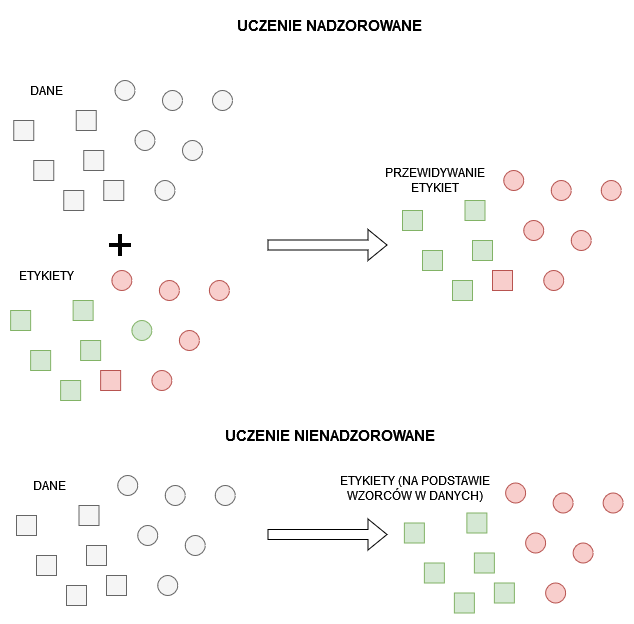

## Algorytm k-means 

Najprostszy algorytm klasteryzacji (algorytm k-średnich) dzieli zbiór na założoną z góry liczbę klastrów (skupień). Na początku, centra klastrów są wylosowane, a następnie w każdym kroku punkty przypisywane są do tego klastra, którego centrum leży najbliżej. Centrum przesuwane jest w stronę średniej (np. arytmetycznej) pozycji wszystkich punktów należących do jego klastra. Procedura jest powtarzana określoną liczbę iteracji lub do momentu, gdy centra klastrów przestaną się przesuwać.

Poniżej przedstawiono działanie oraz implementacje algorytmu k-means w sklearn.

<img src="https://files.realpython.com/media/centroids_iterations.247379590275.gif" width="750" align="center">

Przez to, że początkowe miejsca, gdzie pojawiają się centra klastrów są losowane, algorytm k-średnich jest niedeterministyczny i jego ponowne wywołania mogą dawać różne wyniki.

In [ ]:
# przyjrzyjmy się teraz przykładowi klasteryzacji w pakiecie Sklearn.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_blobs
# stworzymy sztuczny zbiór danych za pomocą funkcji make_blobs, która tworzy wybraną liczbę blobów, żeby nie musieć samodzielnie tworzyć punktów za pomocą losowych funkcji
raw_data = make_blobs(n_samples = 200, n_features = 2, centers = 4, cluster_std = 1.8)

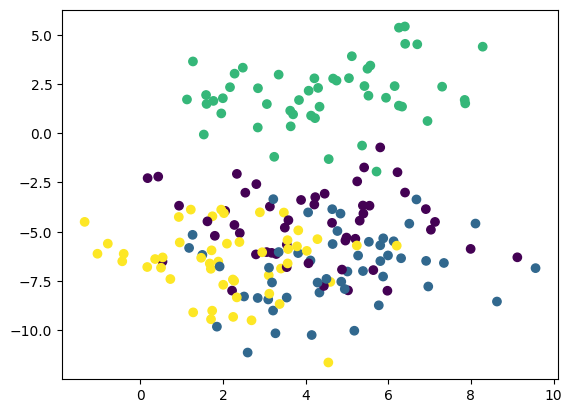

In [ ]:
# podejrzyjmy wygenerowane dane
# dane mają swoje etykiety, ale algorytm nie będzie ich znał - równie dobrze możemy założyć, że ich nie ma.
plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=raw_data[1])
plt.show()

In [ ]:
# pobieramy klasę KMeans z sklearna
from sklearn.cluster import KMeans

# tworzymy model służący do klasteryzacji, a następnie dopasowujemy (uczymy) go za pomocą funkcji fit
model = KMeans(n_clusters=4)
model.fit(raw_data[0]) 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
# wypiszmy teraz etykiety, jakie algorytm przypisał wszystkim danym. Znajdują się w polu labels_
print('Etykiety nadane przez algorytm:')
print(model.labels_)
print('       ')
# wypiszmy odnalezione centra klastrów
print('Centra klastrów:')
print(model.cluster_centers_)

Etykiety nadane przez algorytm:
[2 1 2 3 3 3 3 0 0 0 1 2 1 0 3 1 2 2 0 2 0 1 3 3 3 2 3 0 3 0 2 3 1 3 0 2 2
 2 3 1 3 2 1 0 1 0 2 0 1 3 3 2 2 0 2 0 2 2 1 1 1 3 2 0 1 3 3 0 2 3 2 3 1 1
 1 3 1 3 2 3 0 1 3 2 3 0 0 1 2 3 1 2 1 0 3 3 0 0 0 3 3 1 0 3 3 0 2 2 3 0 2
 2 1 0 1 3 1 1 2 0 3 1 2 0 2 1 3 0 2 2 2 3 2 1 1 2 1 2 2 3 1 1 1 0 3 3 3 1
 0 0 1 2 2 3 3 2 0 0 3 3 0 1 2 2 1 1 0 3 2 2 1 0 1 2 0 2 2 1 0 1 0 2 2 1 0
 2 0 1 1 1 2 2 3 0 1 3 3 2 3 1]
       
Centra klastrów:
[[ 3.51447174 -8.2068962 ]
 [ 4.42585552  1.99671398]
 [ 1.79664463 -5.18097218]
 [ 5.81148973 -4.97925727]]


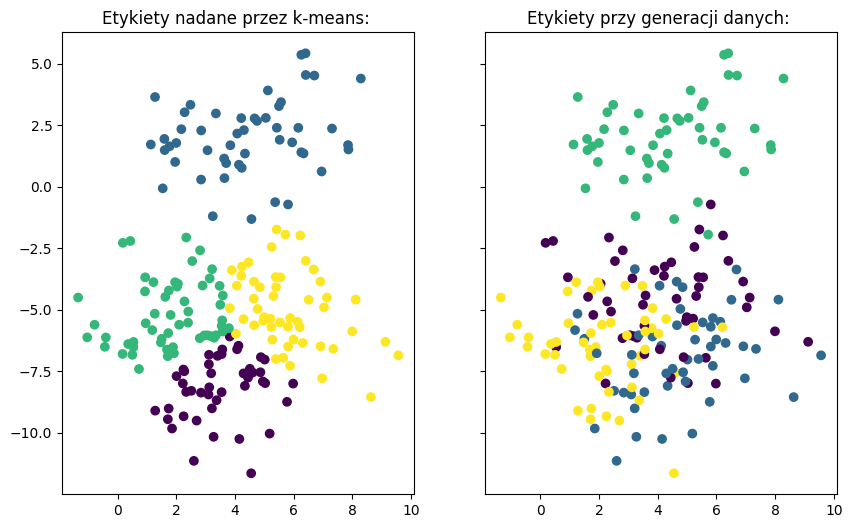

In [ ]:
# teraz obok siebie zobaczmy, jak algorytm podzielił dane, oraz jakie były pierwotne etykiety (których nie znał)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('Etykiety nadane przez k-means: ')
ax1.scatter(raw_data[0][:,0], raw_data[0][:,1],c=model.labels_)

ax2.set_title('Etykiety przy generacji danych: ')
ax2.scatter(raw_data[0][:,0], raw_data[0][:,1],c=raw_data[1])

Jakość przypisania klastrów jest określana przez obliczenie sumy błędu kwadratowego (SSE) po zbieżności centroidów lub dopasowaniu przypisania poprzedniej iteracji. SSE definiuje się jako sumę kwadratów odległości euklidesowych każdego punktu do najbliższego centroidu. Ponieważ jest to miara błędu, celem k-średnich jest próba zminimalizowania tej wartości. 

Najlepsza liczba skupień (k) będzie więc taka, gdzie odległości pomiędzy centroidami a elementami grupy najmniejsze.

### Klasteryzacja hierarchiczna

Zupełnie innym niż k-means podejściem do klasteryzacji jest algorytm klasteryzacji hierarchicznej. W najpopularniejszej jego metodzie, zwanej aglomeracyjną, na początku zakładamy, że każdy punkt jest osobnym klastrem. W każdym kroku algorytmu łączymy dwa klastry, których odległość jest najmniejsza, w jedno skupienie. Wykonujemy tą operację, aż zostanie nam tyle klastrów, ile oczekujemy.

Klasteryzacja hierarchiczna jest deterministyczna i bardziej elastyczna - w wypadku k-means, żeby otrzymać inną ilość klastrów musimy powtórzyć cały algorytm. W wypadku klasteryzacji hierarchicznej wystarczy cofnąć się o krok algorytmu albo wykonać o krok więcej.

Poniżej znajduje się przykład klasteryzacji hierarchicznej:

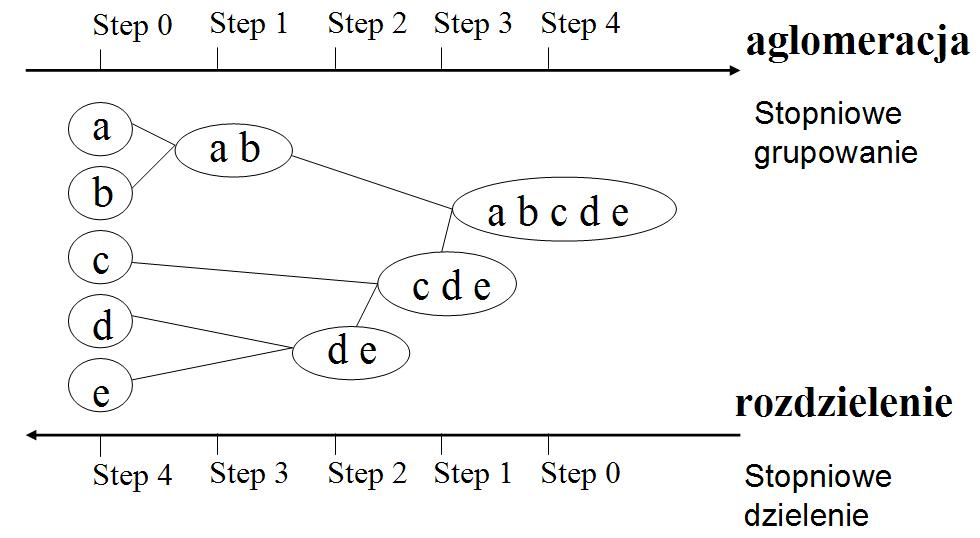

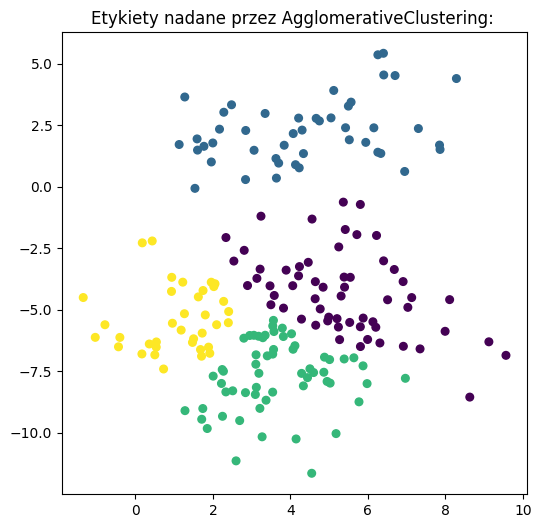

In [ ]:
# pobieramy klasę AgglomerativeClustering z sklearna
from sklearn.cluster import AgglomerativeClustering
# jak w poprzednim przypadku - tworzymy model i uczymy go (dla tych samych danych jak w przypadku k-means)
model = AgglomerativeClustering(n_clusters = 4)
model.fit(raw_data[0])

# zwizualizujmy wyniki na wykresie
plt.figure(figsize =(6, 6))
plt.title('Etykiety nadane przez AgglomerativeClustering: ')
plt.scatter(raw_data[0][:,0],raw_data[0][:,1],c=model.labels_,s=30)
plt.show()

### Algorytm DBSCAN

DBSCAN należy do algorytmów klasteryzacji opartej na gęstości. To zaś polega na budowaniu segmentów na podstawie informacji o zagęszczeniu obserwacji w przestrzeni. Poprzez zagęszczenie należy rozumieć odległości dzielące poszczególne obserwacje w danym obszarze. Jest on często jednym z najlepszych rozwiązań kiedy klastry mają niewypukłe kształty. W przeciwieńtwie pozostałych przedstawionych rozwiązań nie umożliwia definiowania liczby powstałych grup. Odbywa się ona wyłącznie za pomocą zmiany parametrów definiowanych w modelu (minimalnej odległości epsilon oraz minimalnej ilości elementów potrzebnych do powstania zgrupowania). 

Nie wszystkie elementy muszą zostać przypisane do grup. Te, które nie będą ułożone "wystarczająco gęsto" zostaną przez algorytm oznaczone jako szum. 


![gif dbscan!](https://miro.medium.com/v2/resize:fit:1400/1*Wlb4XzugO5k2SuUc3BDZGg.gif)



In [ ]:
# stworzmy model DBSCAN na tych samych, generowanych danych
# pobieramy klasę DBSCAN z sklearna
from sklearn.cluster import DBSCAN

# przy tworzeniu modelu podajemy dwa parametry: eps i min_samples
# należy pamietać, że model nie daje możliwości podania ilości klastrów - zajmuje się tym sam :) 
model = DBSCAN(eps=1.5, min_samples=7)
# uczymy model
model.fit(raw_data[0])
# przypisujemy do zmiennej nadane przez model etykiety klas z pola labels_
labels = model.labels_

# wyliczamy zaproponowaną przez model ilość klastrów oraz punktów szumu
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Liczba klastrów wytworzona przez algorytm w procesie uczenia: %d' % n_clusters_)
print('           ')
print('Liczba wskazanych przez algorytm punktów szumu: %d' % n_noise_)


Liczba klastrów wytworzona przez algorytm w procesie uczenia: 2
           
Liczba wskazanych przez algorytm punktów szumu: 12


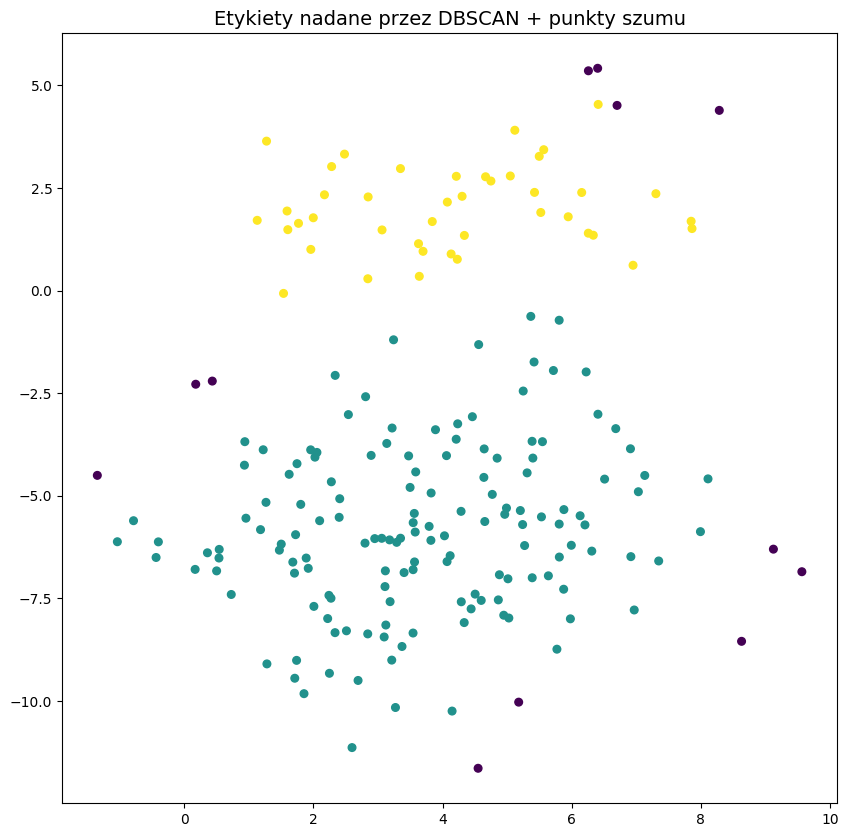

In [ ]:
# zwizualizujmy wyniki na wykresie
plt.figure(figsize=(10,10))
plt.scatter(raw_data[0][:,0],raw_data[0][:,1],c=labels,s=30)
plt.title('Etykiety nadane przez DBSCAN + punkty szumu',fontsize=14)
plt.show()

## Ocena algorytmów klasteryzacyjnych
### Po co w ogóle je oceniać?
1. By ocenić kiedy należy zatrzymać klasteryzację hierarchiczną lub
ocenić czy dobrze określone zostały parametry algorytmu klasteryzacyjnego.
A najbardziej ogólnie: czy to jest to czego szukamy?
2. By porównać rozwiązania uzyskane innymi metodami;
3. By ocenić czy dana metoda jest w danym przypadku aplikowalna (jeśli wiemy jakie powinno być rozwiązanie).


Do omawianych wcześniej zagadnień dotyczących uczenia nadzorowanego używaliśmy takich metryk, które porównywały uzyskany przez model wynik z autentycznymi wartościami. W przypadku klasteryzacji, ze względu na brak tego typu informacji na wejściu taka możliwość nie występuje. **Tutaj klastry są oceniane na podstawie pewnej miary podobieństwa lub odmienności, takiej jak odległość między punktami skupień. Najogólniej - jeśli algorytm  oddziela różne obserwacje a grupuje podobne to działa dobrze.**

Najpopularniejsze metryki oceny dla algorytmów klasteryzacji to współczynnik sylwetkowy (Silhouette score), Daviesa-Bouldin score oraz Indeks Randa. Poniżej opisane zostało ich działanie. Po szczegółowe wzory jednak odsyłamy do dokumentacji. 

### Silhouette

Współczynnik sylwetkowy mieści się w zakresie od -1 do 1, gdzie wyższe wartości odnoszą się do modelu z bardziej spójnymi skupieniami. Współczynniki sylwetkowe bliskie +1 oznaczają, że obserwacje jednego klastra znajdują daleko od sąsiednich klastrów. Wartość 0 świadczy o tym, że jest to bardzo blisko granicy decyzyjnej między dwoma sąsiednimi skupieniami. Wartości ujemne tej metryki z kolei mogą wskazywać na to, że próbki mogły zostać potencjalnie przypisane do niewłaściwego skupienia.

Współczynnik jest wyższy dla gęstych i wypukłych grup (np. otrzymanych z k-means), natomiast może być zawodny dla niewypukłych grup, które może zwrócić np. DBSCAN.

In [ ]:
from sklearn import metrics
#  wyliczenie metryki Silhouette dla powyzszego algorytmu DBSCAN
print("Sihouette Score: %0.3f"
      % metrics.silhouette_score(raw_data[0], labels))

Sihouette Score: 0.473


### Davies-Bouldin 

Wynik jest definiowany jako średnia miara podobieństwa każdego skupienia z jego najbardziej podobnym skupieniem, gdzie podobieństwo to stosunek odległości wewnątrz skupień do odległości między skupieniami. Zatem klastry, które są bardziej oddalone od siebie i mniej rozproszone, dadzą lepszy wynik.

Minimalny wynik to zero, a niższe wartości wskazują na lepsze grupowanie.

In [ ]:
#  wyliczenie DB Score dla powyzszego algorytmu DBSCAN
print("DB Score : %0.3f"
      % metrics.davies_bouldin_score(raw_data[0], labels))

DB Score : 2.371


###Indeks Randa
Indeks Rand oblicza miarę podobieństwa między dwoma skupieniami, biorąc pod uwagę wszystkie pary próbek i licząc pary, które są przypisane do tych samych lub różnych skupień w przewidywanych i prawdziwych skupieniach.

Uwaga: wymaga znajomości "oryginalnych" skupień. Ze względu na fakt, że dane są generowane jest możliwe wyliczenie go (możemy odwołać się do przypisanych przez generator oznaczeń skupień).

𝑅𝐼 zwraca wartości pomiędzy 0 i 1, im wyższy tym bardziej analizowane zgrupowania są podobne. 

In [ ]:
#  wyliczenie wartości indeksu Randa dla powyzszego algorytmu DBSCAN
print("Rand Score : %0.3f"
      % metrics.rand_score(raw_data[1], labels))

Rand Score : 0.594


### Fuzzy clustering (klastrowanie "miękkie", "miękkie k-means")
Algorytm grupowania rozmytych c-means (c-średnich, kolejna metoda klasteryzacji, odnosi się z kolei do bardziej "miękkiego" grupowania, opartego na wnioskowaniu rozmytym. 

W "klasycznych" algorytmach klasteryzacji przynależność danego punktu do klastra można określić tylko jako "0" - nie należy lub "1" - należy. Oznacza to, że pomiędzy powstałymi klastrami można łatwo wyznaczyć wyraźną granicę. 

W modelu c-means dane są powiązane z każdym klastrem za pomocą funkcji przynależności, która reprezentuje rozmyte zachowanie tego algorytmu. Aby to zrobić, musimy po prostu zbudować odpowiednią macierz, której czynnikami są liczby z przedziału od 0 do 1 i reprezentują stopień przynależności między danymi a centrami klastrów. Granice skupień w tym przypadku będą miały charakter rozmyty.

W tym podejściu ten sam punkt nie należy wyłącznie do zdefiniowanego klastra, ale można go umieścić "pomiędzy klastrami". Funkcja przynależności jest gładsza - każdy element może "należeć" do kilku klastrów, a więc posiadać różne wartości funkcji przynależności.

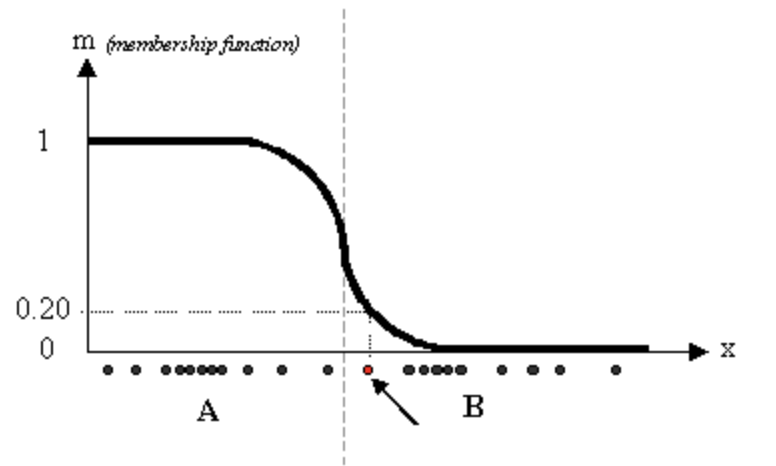


In [3]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=00cfb390250fe92856f954fe739d61fd2740b408f166ffae20df87057432159a
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


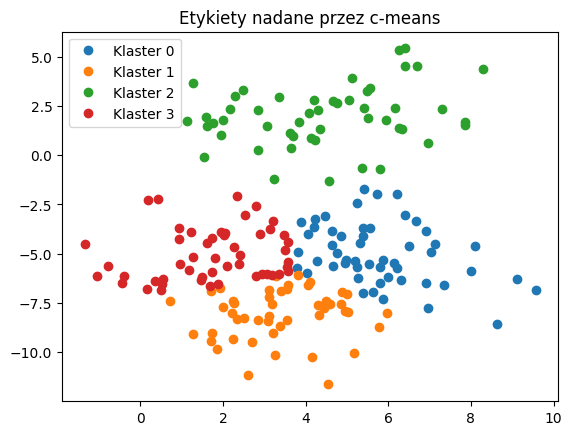

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# połączenie wygenerowanych na potrzeby poprzednich przykładów danych
all_data = np.vstack((raw_data[0][:,0], raw_data[0][:,1]))

# stworzenie modelu c-means dla powyższych danych oraz 4 klastrów
cntr, u_orig, u0, d, jm, p, fpc  = fuzz.cluster.cmeans(
    all_data, 4, 2, error=0.005, maxiter=1000)

# zaprezentowanie modelu w formie graficznej
fig2, ax2 = plt.subplots()
ax2.set_title('Etykiety nadane przez c-means')
for j in range(4):
    ax2.plot(all_data[0, u_orig.argmax(axis=0) == j],
             all_data[1, u_orig.argmax(axis=0) == j], 'o',
             label='Klaster ' + str(j))
ax2.legend()
plt.show()

## Zadania do samodzielnego wykonania

1.

Proszę pobrać plik press_readers_chicago.csv, zawierający informacje o czytelnictwie w pewnej grupie wiekowej. Pierwsza kolumna przedstawia informacje o czasie, jaki dany czytelnik poświęca na lekturę, w drugiej zaś znajduje się liczba jego sekcji czytelniczych. Proszę dokonać klasteryzacji zbioru z użyciem algorytmu k-means w dwóch wariantach - w jednym proszę wykonać normalizację danych, w drugim zaś pominąć tę procedurę. Uzyskane wyniki należy zwizualizować, opisać i porównać. Dla każdego z wariantów proszę o zarekomendowanie odpowiedniej ilości klastrów. 

Załóżmy, że w tym miesiącu przybyło 3 nowych czytelników. Proszę przyjąć dla nich dowolne wartości sekcji i czasu oraz dokonać predykcji klastra zgodnie z jednym z wykonanych modeli. 

2.

W pliku planets.csv mają państwo zbiór 778 spośród ponad 5000 znanych egzoplanet (planet pozasłonecznych) pozyskany z bazy danych NASA (https://exoplanetarchive.ipac.caltech.edu/index.html). Proszę dokonać klasteryzacji tego zbioru kilkoma sposobami, wybrać któryś z wyników i opisać uzyskane rezultaty (czym się charakteryzują klastry).

Poniżej znajduje się opis kolumn do zestawu danych:


         pl_name:        Planet Name,
         pl_orbper:      Orbital Period [days]',
         pl_orbsmax:     Orbit Semi-Major Axis [au]),
         pl_rade:        Planet Radius [Earth Radius],
         pl_masse:       Planet Mass [Earth Mass],
         pl_orbeccen:    Eccentricity,
         pl_eqt:         Equilibrium Temperature [K],
         st_teff:        Stellar Effective Temperature [K],
         st_mass:        Stellar Mass [Solar mass],
         sy_dist:        Distance [pc]


3.

Z użyciem algorytmu fuzzy clustering proszę zaproponować model dla podanego powyżej zestawu danych. Do uczenia należy wybrać wyłącznie połowę jego kolumn.
 
4.

Proszę wygenerować zestaw danych podobny do grafiki poniżej - przedstawiający dwa klastry w kształcie księżyców - i zawierający minimum 1000 próbek. Wykorzystując wszystkie (za wyjątkiem c-means) poznane do tej pory algorytmy klasteryzacyjne proszę podjąć kilka prób dopasowania jak najlepszego modelu, za każdym razem oceniając rozwiązanie z użyciem dedykowanych do tego metryk. Który z algorytmów najlepiej radzi sobie z takim układem danych i dlaczego?

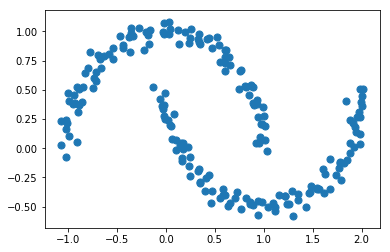

___________________________________
## Dodatkowe materiały
* https://matteucci.faculty.polimi.it/Clustering/tutorial_html/cmeans.html
* https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html


Zad 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 0, 'Time in minutes')

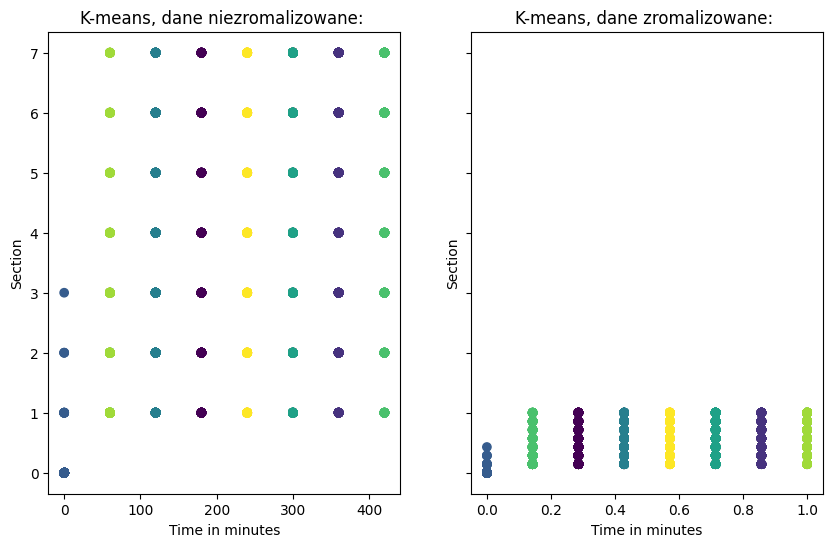

In [ ]:
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


drive.mount('/content/drive')
url = '/content/drive/MyDrive/Colab Notebooks/Data_MIO/press_readers_chicago.csv'
data = pd.read_csv(url, sep=";")

model = KMeans(n_clusters=8)
model.fit(data) 

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.set_title('K-means, dane niezromalizowane: ')
ax1.scatter(data['time in minutes'], data['section'], c=model.labels_)
ax1.set_ylabel('Section')
ax1.set_xlabel('Time in minutes')

sc = MinMaxScaler()
normal_data = sc.fit_transform(data)
normal_data = pd.DataFrame(normal_data, columns=['time in minutes', 'section'])

model2 = KMeans(n_clusters=8)
model2.fit(data) 

ax2.set_title('K-means, dane zromalizowane: ')
ax2.scatter(normal_data['time in minutes'], normal_data['section'], c=model2.labels_)
ax2.set_ylabel('Section')
ax2.set_xlabel('Time in minutes')

Zad 2

In [ ]:
from google.colab import drive
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


drive.mount('/content/drive')
url = '/content/drive/MyDrive/Colab Notebooks/Data_MIO/planets.csv'
data = pd.read_csv(url, sep=",")
# sc = StandardScaler()
# data = sc.fit_transform(data.iloc[:, 1:])
# data = pd.DataFrame(data, columns=['pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_masse', 'pl_orbeccen', 'pl_eqt', 'st_teff', 'st_mass', 'sy_dist'])

model = DBSCAN(eps=200, min_samples=10)
labels = model.fit_predict(data.iloc[:, 1:])
data['cluster'] = labels

for cluster_id, group in data.groupby('cluster'):
    print(f"Cluster {cluster_id}:")
    display(group)
    print("\n")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cluster -1:


,pl_name,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_orbeccen,pl_eqt,st_teff,st_mass,sy_dist,cluster
0,55 Cnc e,0.736544,0.01544,2.080,7.81000,0.061,1958,5234.0,0.91,12.5855,-1
4,CoRoT-10 b,13.240600,0.10550,10.870,874.00000,0.530,600,5075.0,0.89,338.3860,-1
5,CoRoT-11 b,2.994330,0.04360,16.030,740.51000,0.000,1657,6440.0,1.27,655.0370,-1
6,CoRoT-12 b,2.828042,0.04016,16.140,291.43800,0.070,1442,5675.0,1.08,1126.3700,-1
7,CoRoT-13 b,4.035190,0.05100,9.920,415.70400,0.000,1700,5945.0,1.09,1148.9300,-1
...,...,...,...,...,...,...,...,...,...,...,...
770,Wendelstein-1 b,2.663416,0.02820,11.561,188.15536,0.012,2198,4251.0,0.65,305.3000,-1
771,Wendelstein-2 b,1.752224,0.02340,12.993,232.33373,0.057,2470,4591.0,0.73,565.5410,-1
774,XO-6 b,3.765001,0.08150,23.203,1398.45200,0.000,1577,6720.0,1.47,235.4790,-1
776,pi Men c,6.267900,0.06839,2.042,4.82000,0.000,1170,6037.0,1.09,18.2702,-1




Cluster 0:


,pl_name,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_orbeccen,pl_eqt,st_teff,st_mass,sy_dist,cluster
1,AU Mic b,8.463000,0.0645,4.070,17.00000,0.000,593,3700.0,0.50,9.7221,0
2,AU Mic c,18.859019,0.1101,3.240,13.60000,0.000,454,3700.0,0.50,9.7221,0
34,G 9-40 b,5.746007,0.0385,2.025,11.70000,0.000,456,3348.0,0.29,27.9276,0
35,GJ 1132 b,1.628931,0.0153,1.130,1.66000,0.220,529,3270.0,0.18,12.6130,0
36,GJ 1214 b,1.580404,0.0149,2.742,8.17000,0.063,596,3250.0,0.18,14.6427,0
...,...,...,...,...,...,...,...,...,...,...,...
616,TOI-530 b,6.387597,0.0520,9.303,127.13136,0.000,565,3659.0,0.53,148.7620,0
617,TOI-532 b,2.326651,0.0296,5.820,61.50000,0.000,867,3927.0,0.64,135.0470,0
630,TOI-674 b,1.977143,0.0250,5.250,23.60000,0.000,635,3514.0,0.42,46.0851,0
634,TOI-776 b,8.246610,0.0652,1.850,4.00000,0.060,514,3709.0,0.54,27.1701,0




Cluster 1:


,pl_name,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_orbeccen,pl_eqt,st_teff,st_mass,sy_dist,cluster
29,EPIC 220674823 c,13.339700,0.10500,2.500,5.80000,0.180,774,5470.0,0.94,244.5900,1
32,EPIC 249893012 c,15.624000,0.13000,3.670,14.67000,0.070,990,5430.0,1.05,321.2960,1
38,GJ 143 b,35.612530,0.19150,2.610,22.70000,0.188,422,4640.0,0.73,16.3200,1
47,HAT-P-11 b,4.887816,0.05300,4.730,25.74300,0.198,878,4780.0,0.81,37.7647,1
48,HAT-P-12 b,3.213060,0.03840,10.749,67.05900,0.000,963,4650.0,0.73,142.7510,1
...,...,...,...,...,...,...,...,...,...,...,...
765,WASP-97 b,2.072760,0.03303,12.670,419.52000,0.000,1555,5640.0,1.12,151.0680,1
766,WASP-98 b,2.962640,0.03600,12.330,263.79000,0.000,1180,5525.0,0.69,281.7420,1
772,Wolf 503 b,6.001270,0.05706,2.043,6.26000,0.410,790,4716.0,0.69,44.5260,1
773,XO-5 b,4.187756,0.05150,12.780,378.20000,0.000,1230,5430.0,1.04,276.2110,1




Cluster 2:


,pl_name,pl_orbper,pl_orbsmax,pl_rade,pl_masse,pl_orbeccen,pl_eqt,st_teff,st_mass,sy_dist,cluster
3,BD+20 594 b,41.685500,0.2410,2.230,16.30000,0.000,546,5766.0,0.96,179.4610,2
196,HD 136352 b,11.577790,0.0969,1.482,4.62000,0.079,911,5850.0,0.91,14.6820,2
197,HD 136352 b,11.577970,0.0964,1.664,4.72000,0.000,905,5664.0,0.87,14.6820,2
198,HD 136352 c,27.590900,0.1729,2.608,11.29000,0.037,682,5850.0,0.91,14.6820,2
199,HD 136352 c,27.592210,0.1721,2.916,11.24000,0.000,677,5664.0,0.87,14.6820,2
208,HD 183579 b,17.471275,0.1300,3.530,11.20000,0.000,748,5706.0,1.03,57.2651,2
209,HD 183579 b,17.471278,0.1334,3.550,19.70000,0.280,769,5788.0,1.03,57.2651,2
291,K2-24 b,20.885100,0.1540,5.680,21.00000,0.000,767,5743.0,1.12,170.5620,2
292,K2-24 c,42.363300,0.2470,7.820,27.00000,0.000,606,5743.0,1.12,170.5620,2
307,K2-287 b,14.893291,0.1206,9.494,100.11645,0.478,804,5695.0,1.06,158.3350,2


Planety w klasterze 0 oraz 1 mają podobne wartości w kolumnach: st_teff,	st_mass oraz pl_orbsmax. Klaser 2 wykazuje zbliżone wartości w tych kolumnach oraz w kolumnie pl_rade

Zad 3

In [6]:
!pip install scikit-fuzzy

import pandas as pd
import skfuzzy as fuzz
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

drive.mount('/content/drive')
url = '/content/drive/MyDrive/Colab Notebooks/Data_MIO/planets.csv'
data = pd.read_csv(url, sep=",")

features = ['pl_orbper', 'pl_rade', 'pl_masse', 'st_teff', 'st_mass']
X = data[features].values

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

k = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_norm.T, k, 2, error=0.005, maxiter=1000, init=None)

clusters = []
for i in range(len(u)):
    cluster = max(enumerate(u[:, i]), key=lambda x: x[1])[0]
    clusters.append(cluster)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Zad 4

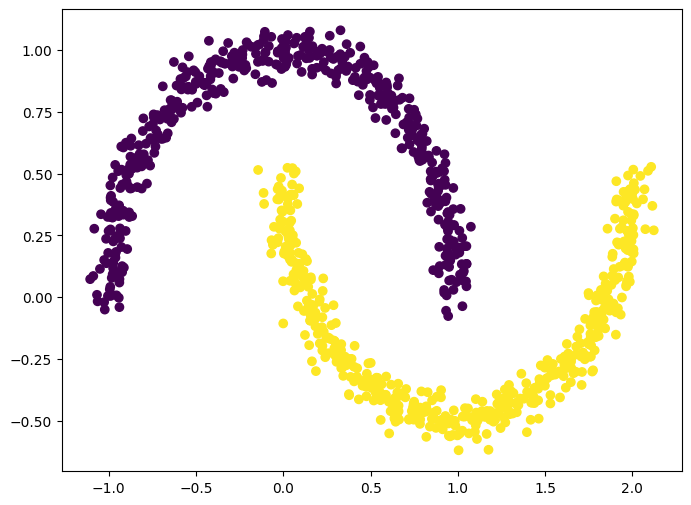

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score - KMeans:  0.4887268471194725
Calinski-Harabasz score - KMeans:  1471.8950823841622
Silhouette score - DBSCAN:  0.33440074394139574
Calinski-Harabasz score - DBSCAN:  659.5445288792987
Silhouette score - AgglomerativeClustering:  0.4599249015601888
Calinski-Harabasz score - AgglomerativeClustering:  1278.5183980519732


In [8]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Generowanie i wyświetlenie danych
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

# przykładowe użycie algorytmów klasteryzacyjnych
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
dbscan = DBSCAN(eps=0.3, min_samples=5).fit(X)
agglomerative = AgglomerativeClustering(n_clusters=2).fit(X)

# ocena jakości klasteryzacji za pomocą miar silhouette score i calinski_harabasz_score
print("Silhouette score - KMeans: ", silhouette_score(X, kmeans.labels_))
print("Calinski-Harabasz score - KMeans: ", calinski_harabasz_score(X, kmeans.labels_))
print("Silhouette score - DBSCAN: ", silhouette_score(X, dbscan.labels_))
print("Calinski-Harabasz score - DBSCAN: ", calinski_harabasz_score(X, dbscan.labels_))
print("Silhouette score - AgglomerativeClustering: ", silhouette_score(X, agglomerative.labels_))
print("Calinski-Harabasz score - AgglomerativeClustering: ", calinski_harabasz_score(X, agglomerative.labels_))

Algorytm KMeans radzi sobie najlepiej z takim układem danych z dwoma klastrami w kształcie księżyców, ponieważ w swoim działaniu stara się minimalizować wariancję wewnątrz klastrów, a jednocześnie maksymalizować odległość między klastrami. W przypadku takiego układu danych, gdzie klastry są dobrze oddzielone, algorytm ten dobrze sobie radzi i efektywnie wyznacza granice klastrów.